In [1]:
from statistics import pop_mean_test, pop_mean_interval, resumo_metodos_distribuicoes, resumo_teste_hipoteses

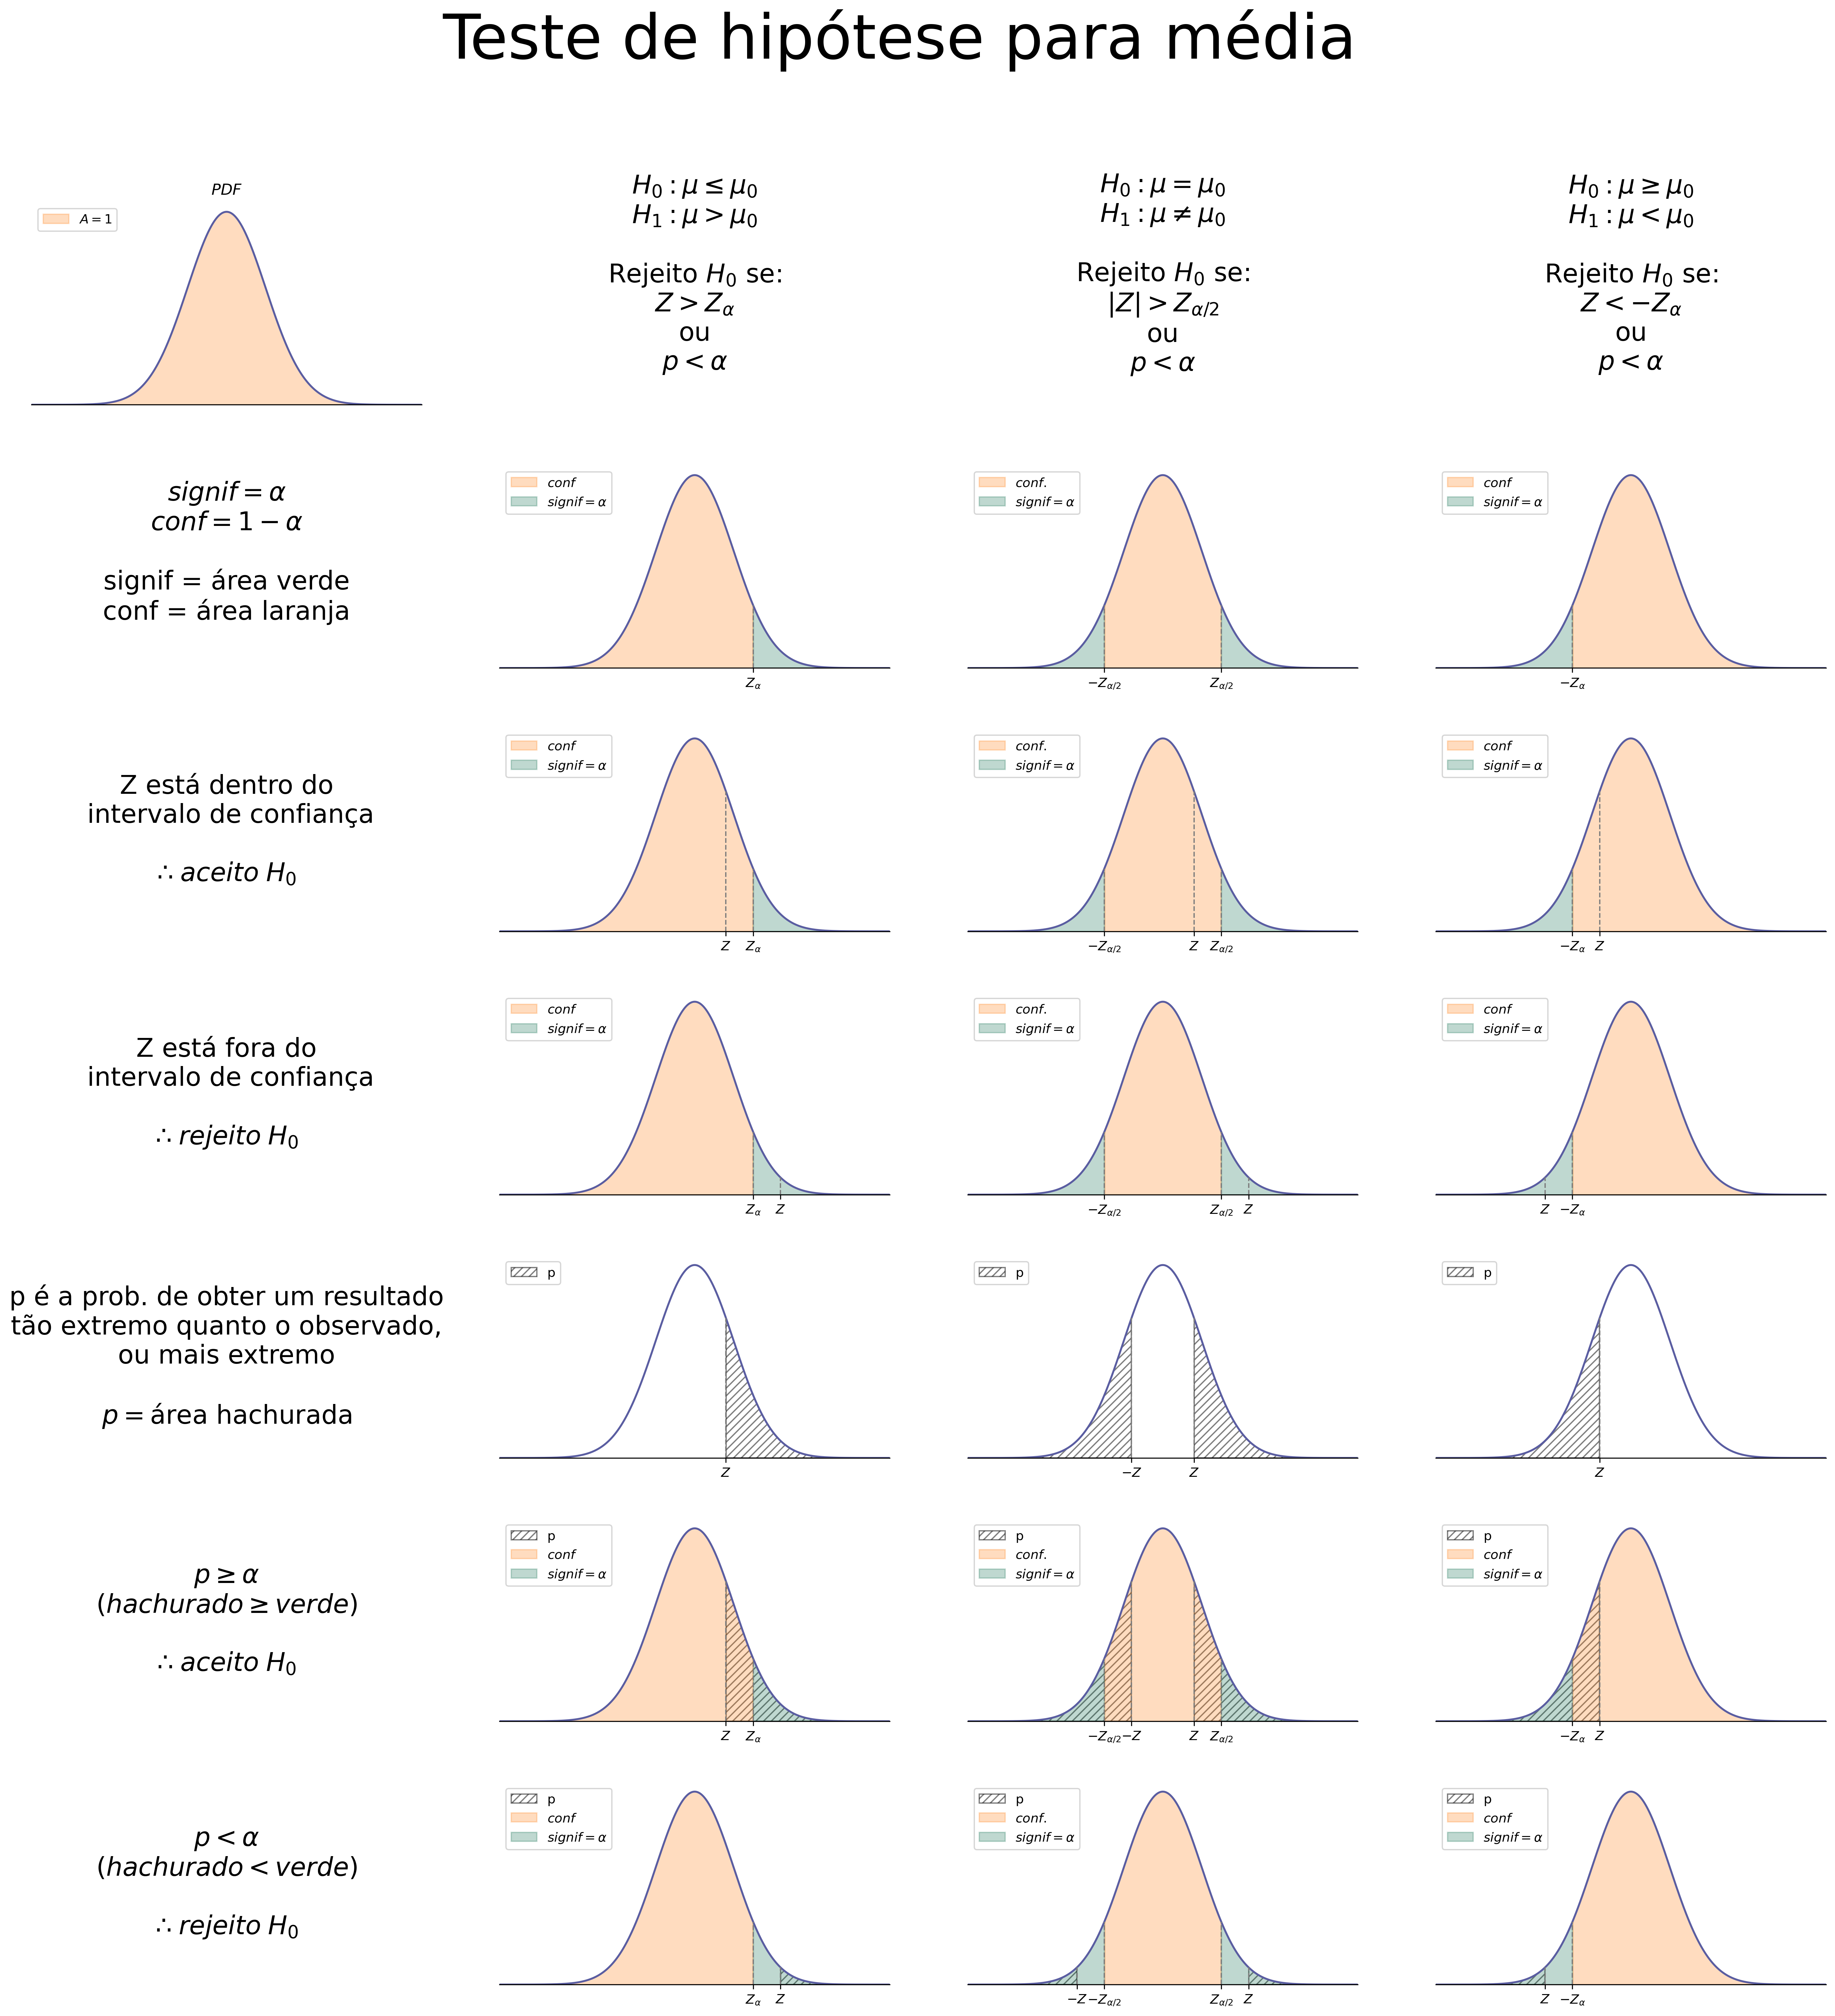

In [2]:
resumo_teste_hipoteses()

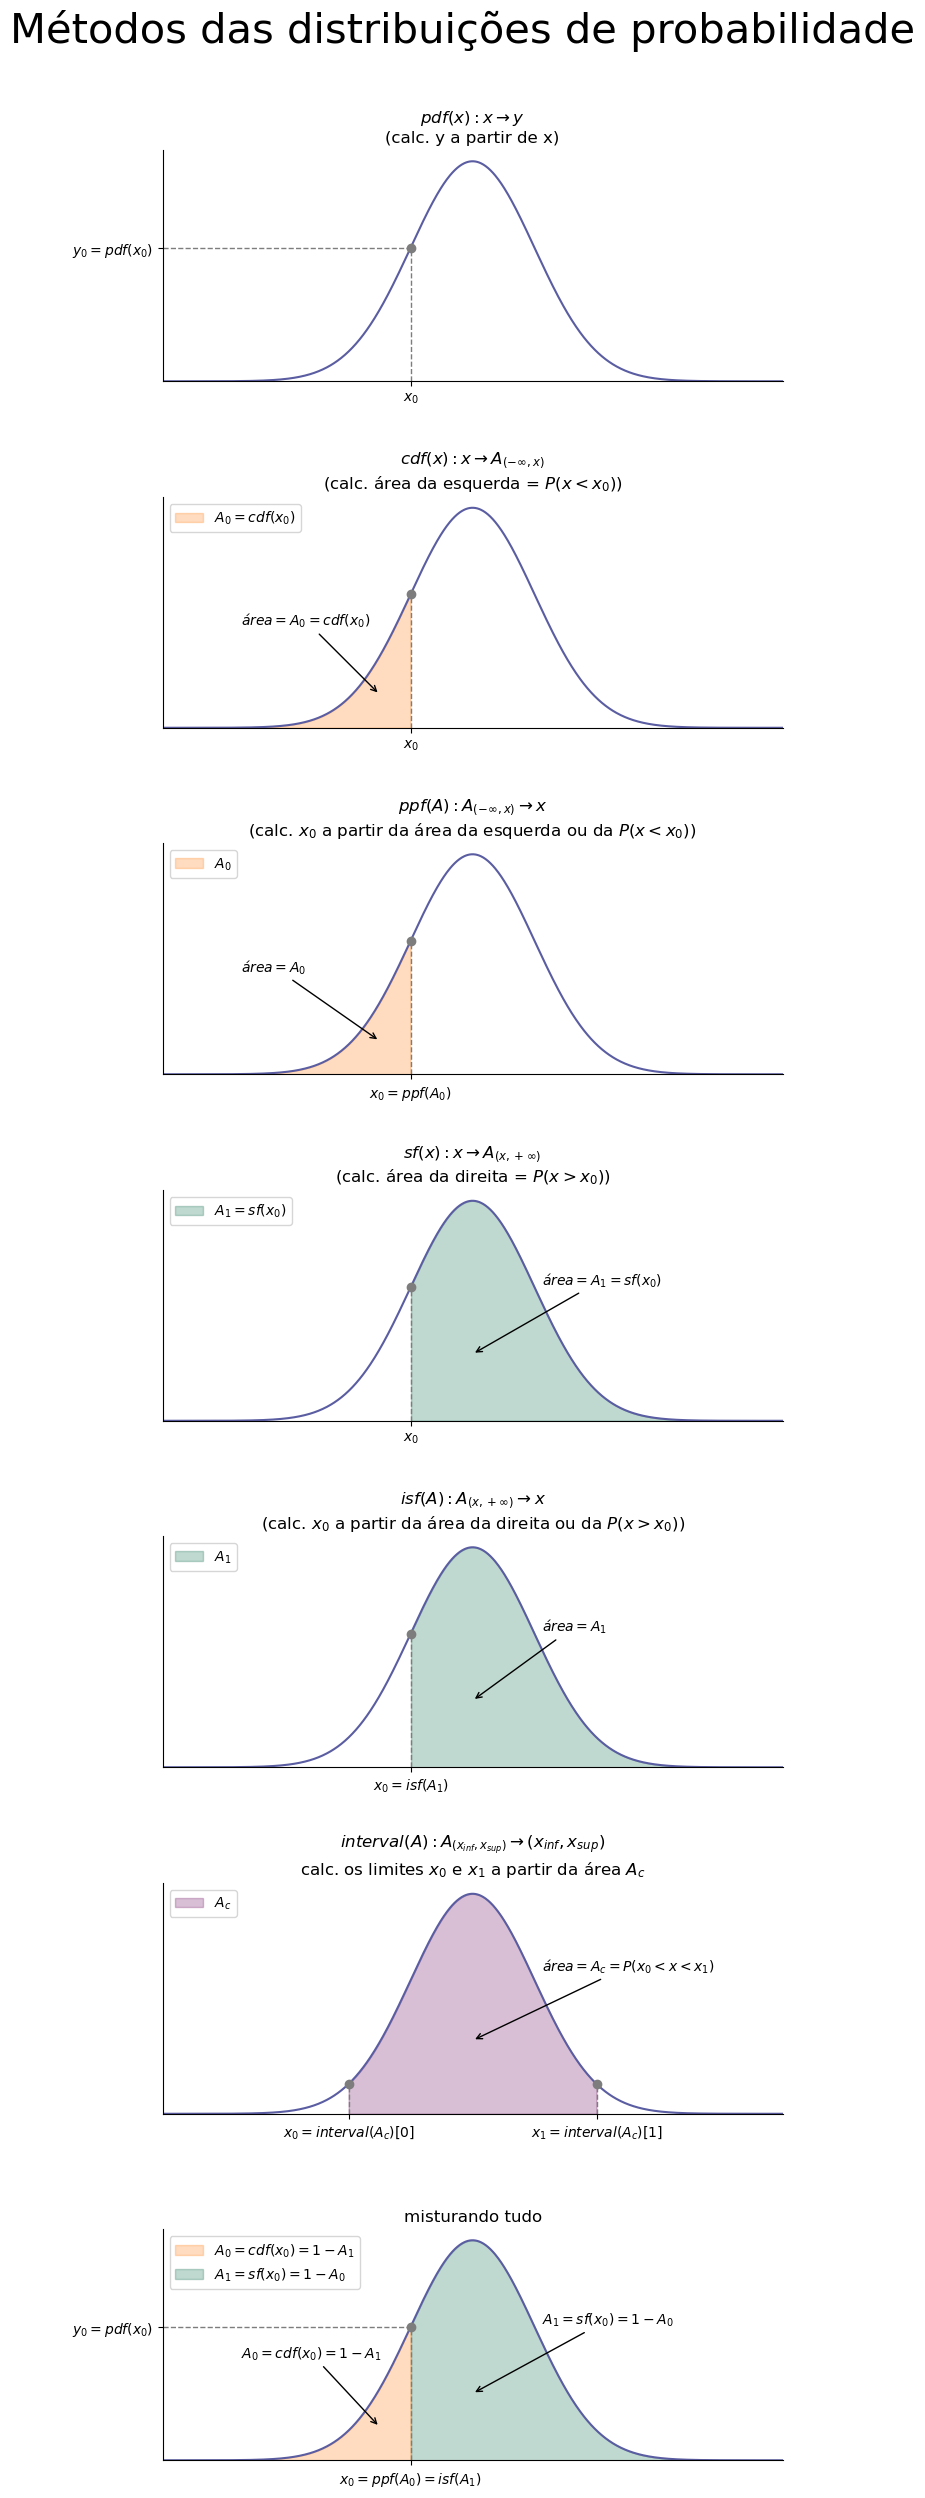

In [3]:
resumo_metodos_distribuicoes()

---

# Exercícios de intervalo de confiança

Se uma amostra aleatória n=250, tem uma média amostral de 51,3 e uma desvio padrão populacional de σ=2. Construa o intervalo com 95% de confiança para a média populacional μ.

In [4]:
from scipy.stats import norm
import numpy as np

# desvio padrão da média:
confianca = 0.95
significancia = 1 - confianca
med_amostra = 51.3
sigma = 2
n = 250
desvio_med = sigma/np.sqrt(n)
limite_inferior, limite_superior = norm.interval(confianca, loc=med_amostra, scale=desvio_med)
limite_inferior, limite_superior

(51.052081987078175, 51.54791801292182)

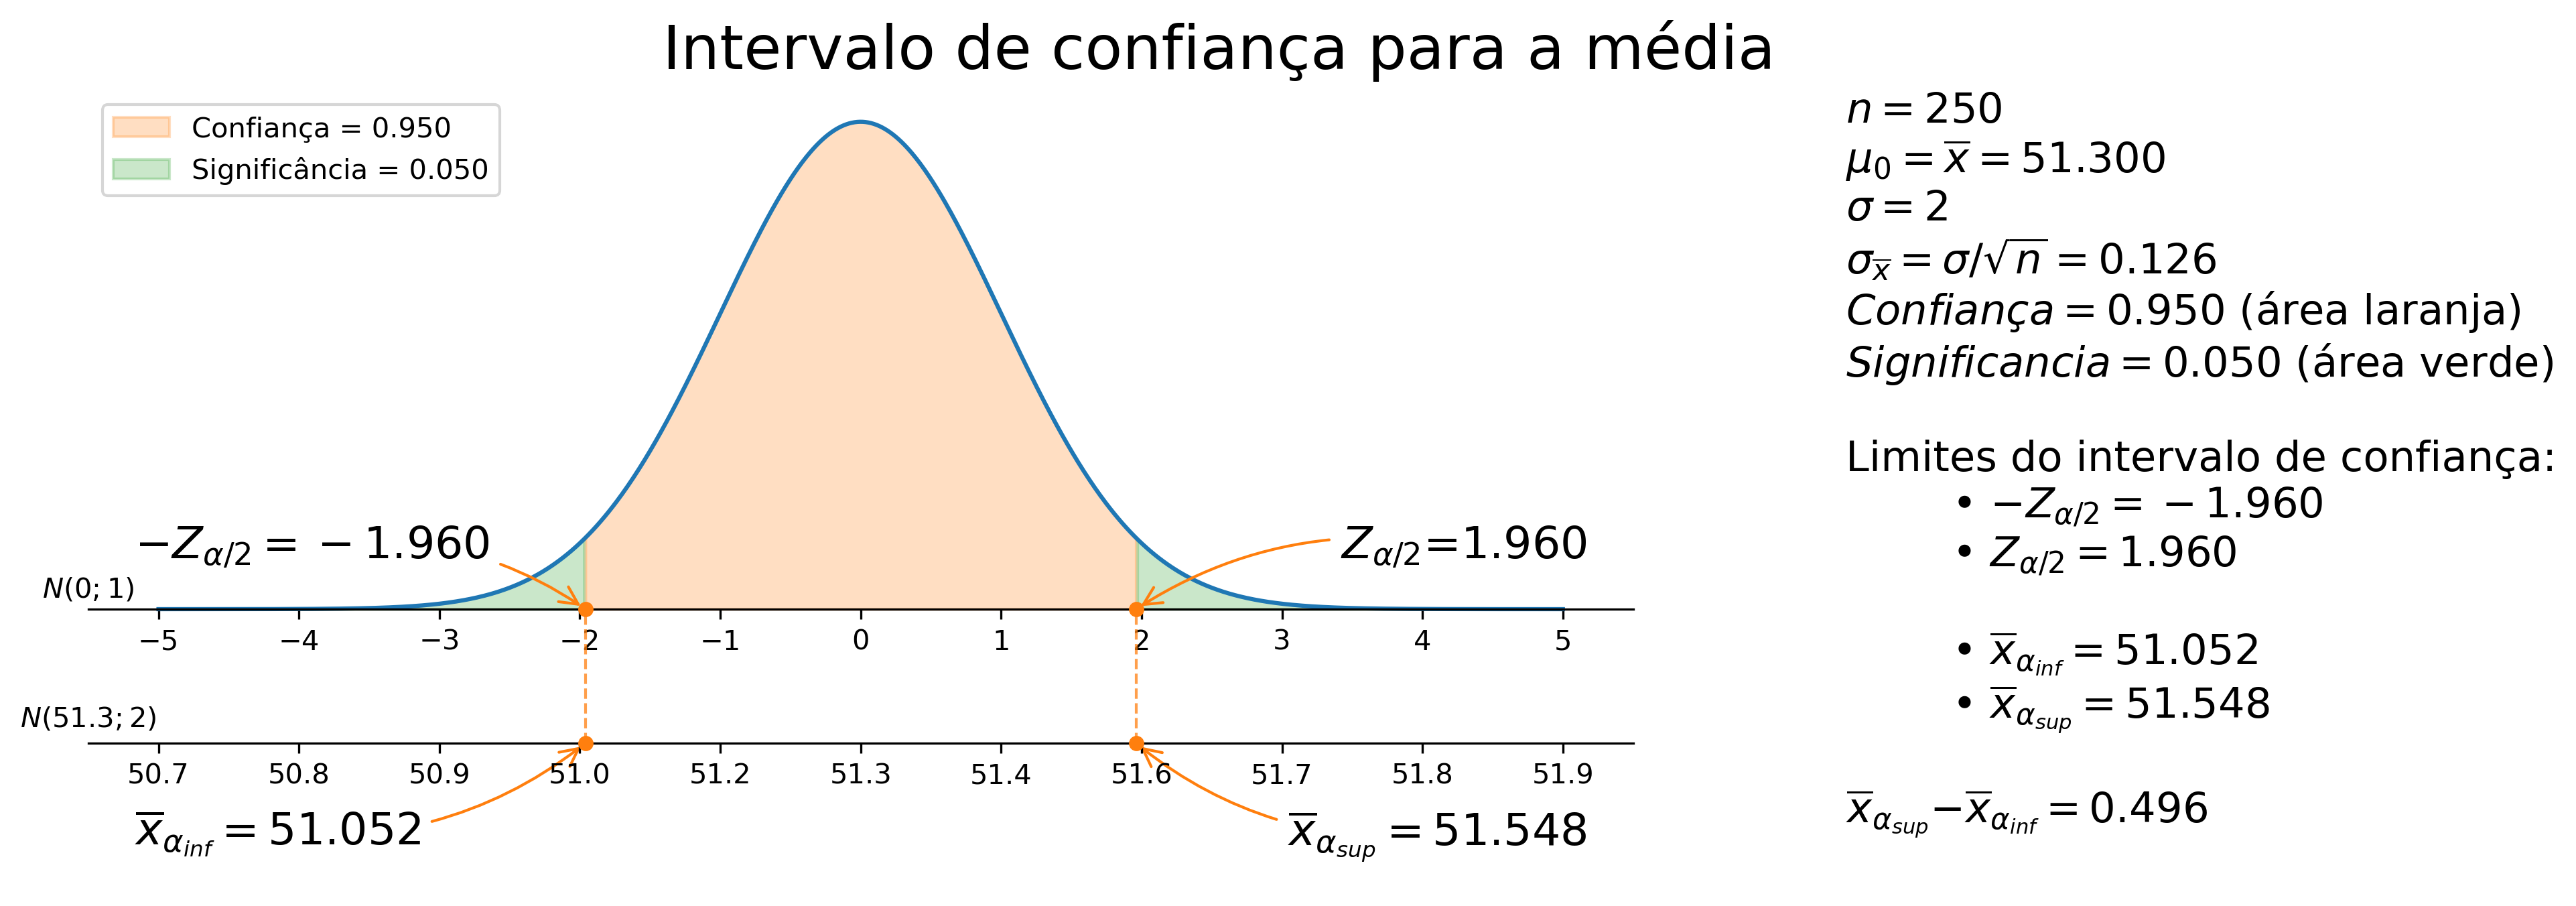

In [5]:
pop_mean_interval(n=250, x_bar=51.3, sigma=2, conf=.95)

---

Sabe-se que a vida em horas de um bulbo de lâmpada de 75 W é distribuída de forma aproximadamente normal com desvio padrão de σ = 25. Uma amostra aleatória de 200 bulbos tem uma vida media de 1.014 horas. Construa um intervalo de confiança de 95% para a vida média.

In [6]:
from scipy.stats import norm
import numpy as np

# desvio padrão da média:
confianca = 0.95
significancia = 1 - confianca
med_amostra = 1014
sigma = 25
n = 200
desvio_med = sigma/np.sqrt(n)
limite_inferior, limite_superior = norm.interval(.95, loc=med_amostra, scale=desvio_med)
limite_inferior, limite_superior

(1010.5352404391258, 1017.4647595608742)

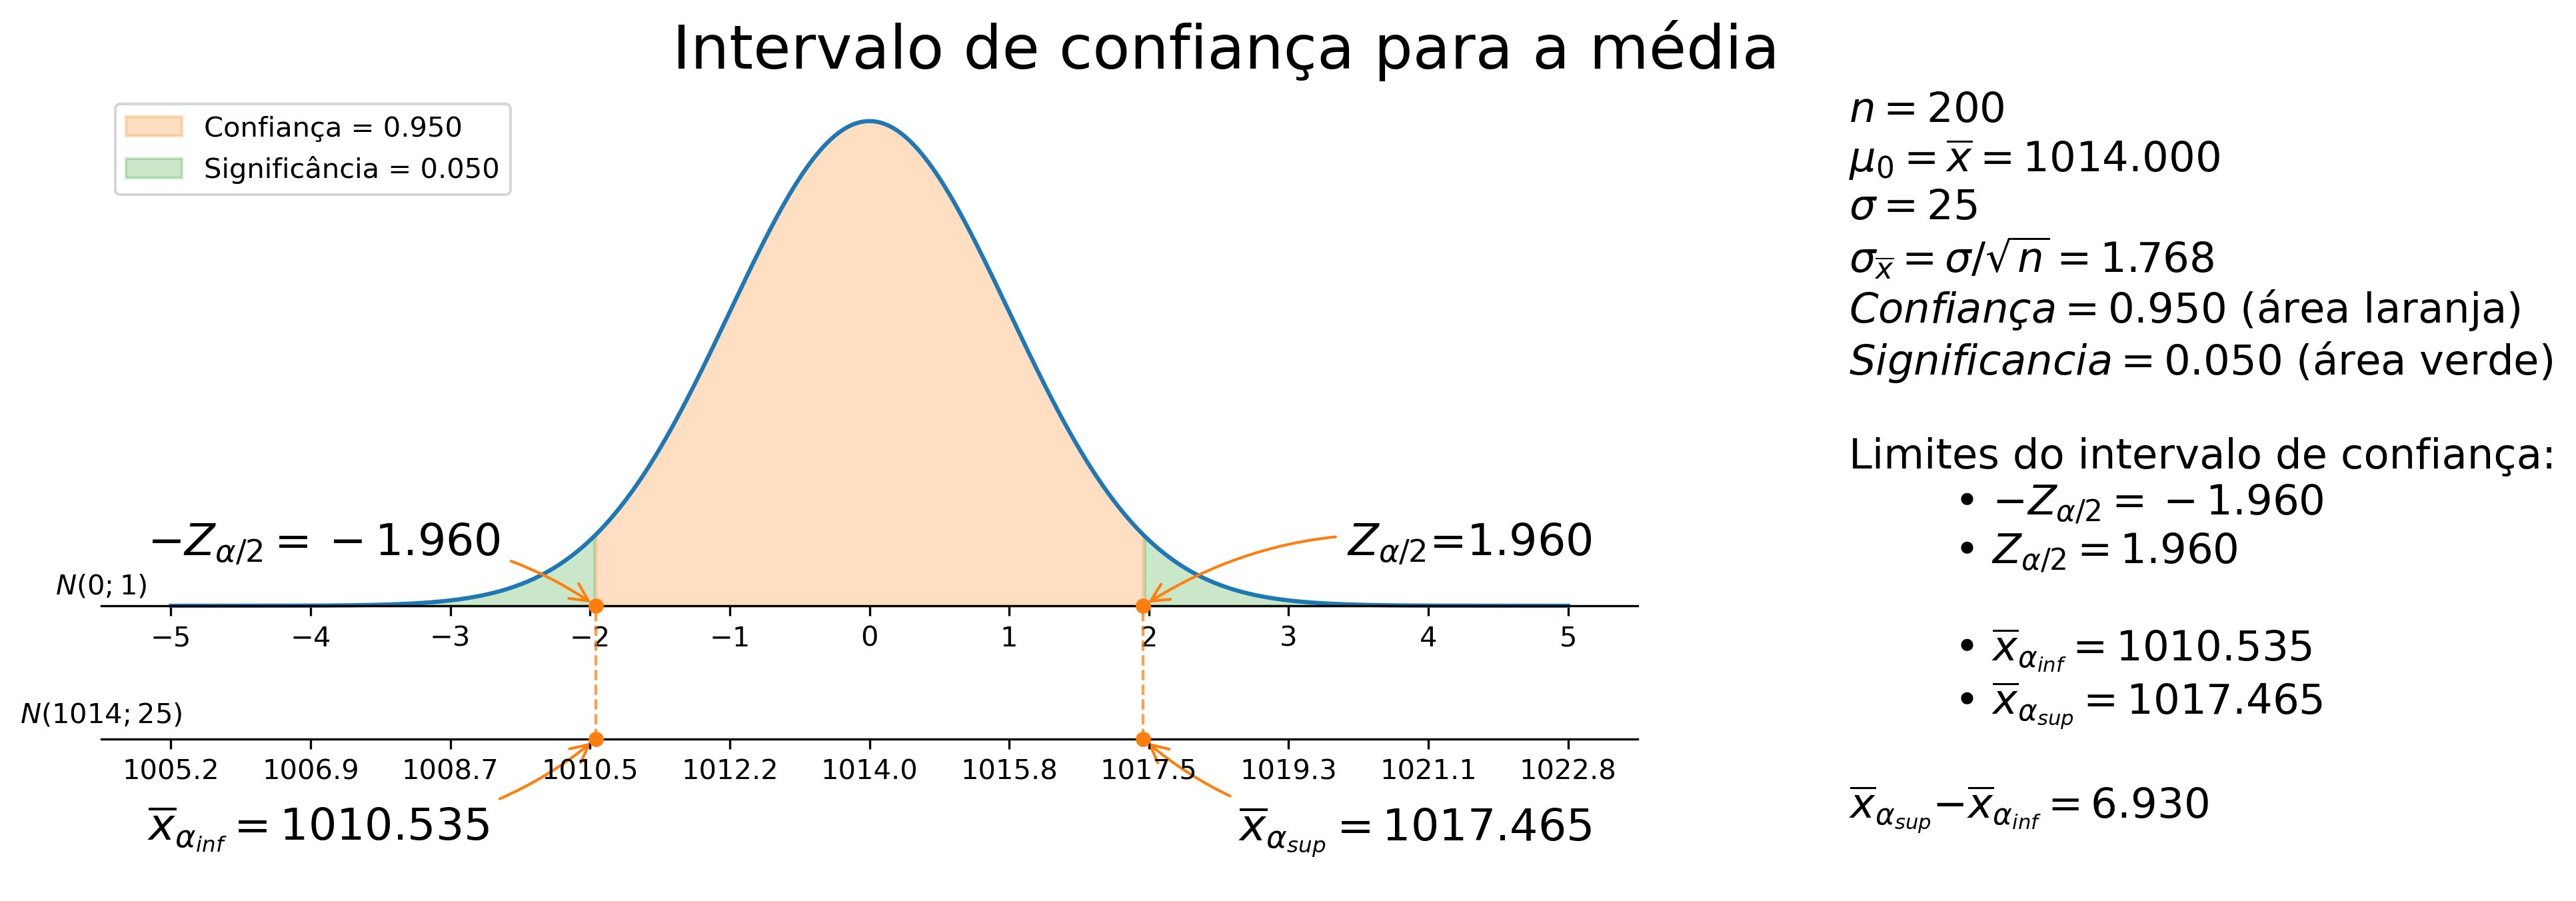

In [7]:
pop_mean_interval(n=200, x_bar=1014, sigma=25, conf=.95)

---

Qual deve ser o tamanho da amostra para que o intervalo com 99,5% de confiança para a média populacional tenha uma semi-amplitude (ou erro) não superior a 1,5? Sabe-se que a variância populacional é de 23.

In [8]:
import math
from scipy.stats import norm
import numpy as np

#Encontra o desvio padrão a partir de um intervalo e sua confiança
def norm_find_sigma(alpha, interval):
    z = -norm.ppf((1-alpha)/2)
    z_i = interval/2
    return z_i/z

confianca = 0.995
sigma = np.sqrt(23)
semi_amplitude = 1.5
amplitude = 2*semi_amplitude
desv_media_amostra = norm_find_sigma(confianca, amplitude)
n = math.ceil((sigma/desv_media_amostra)**2)
n

81

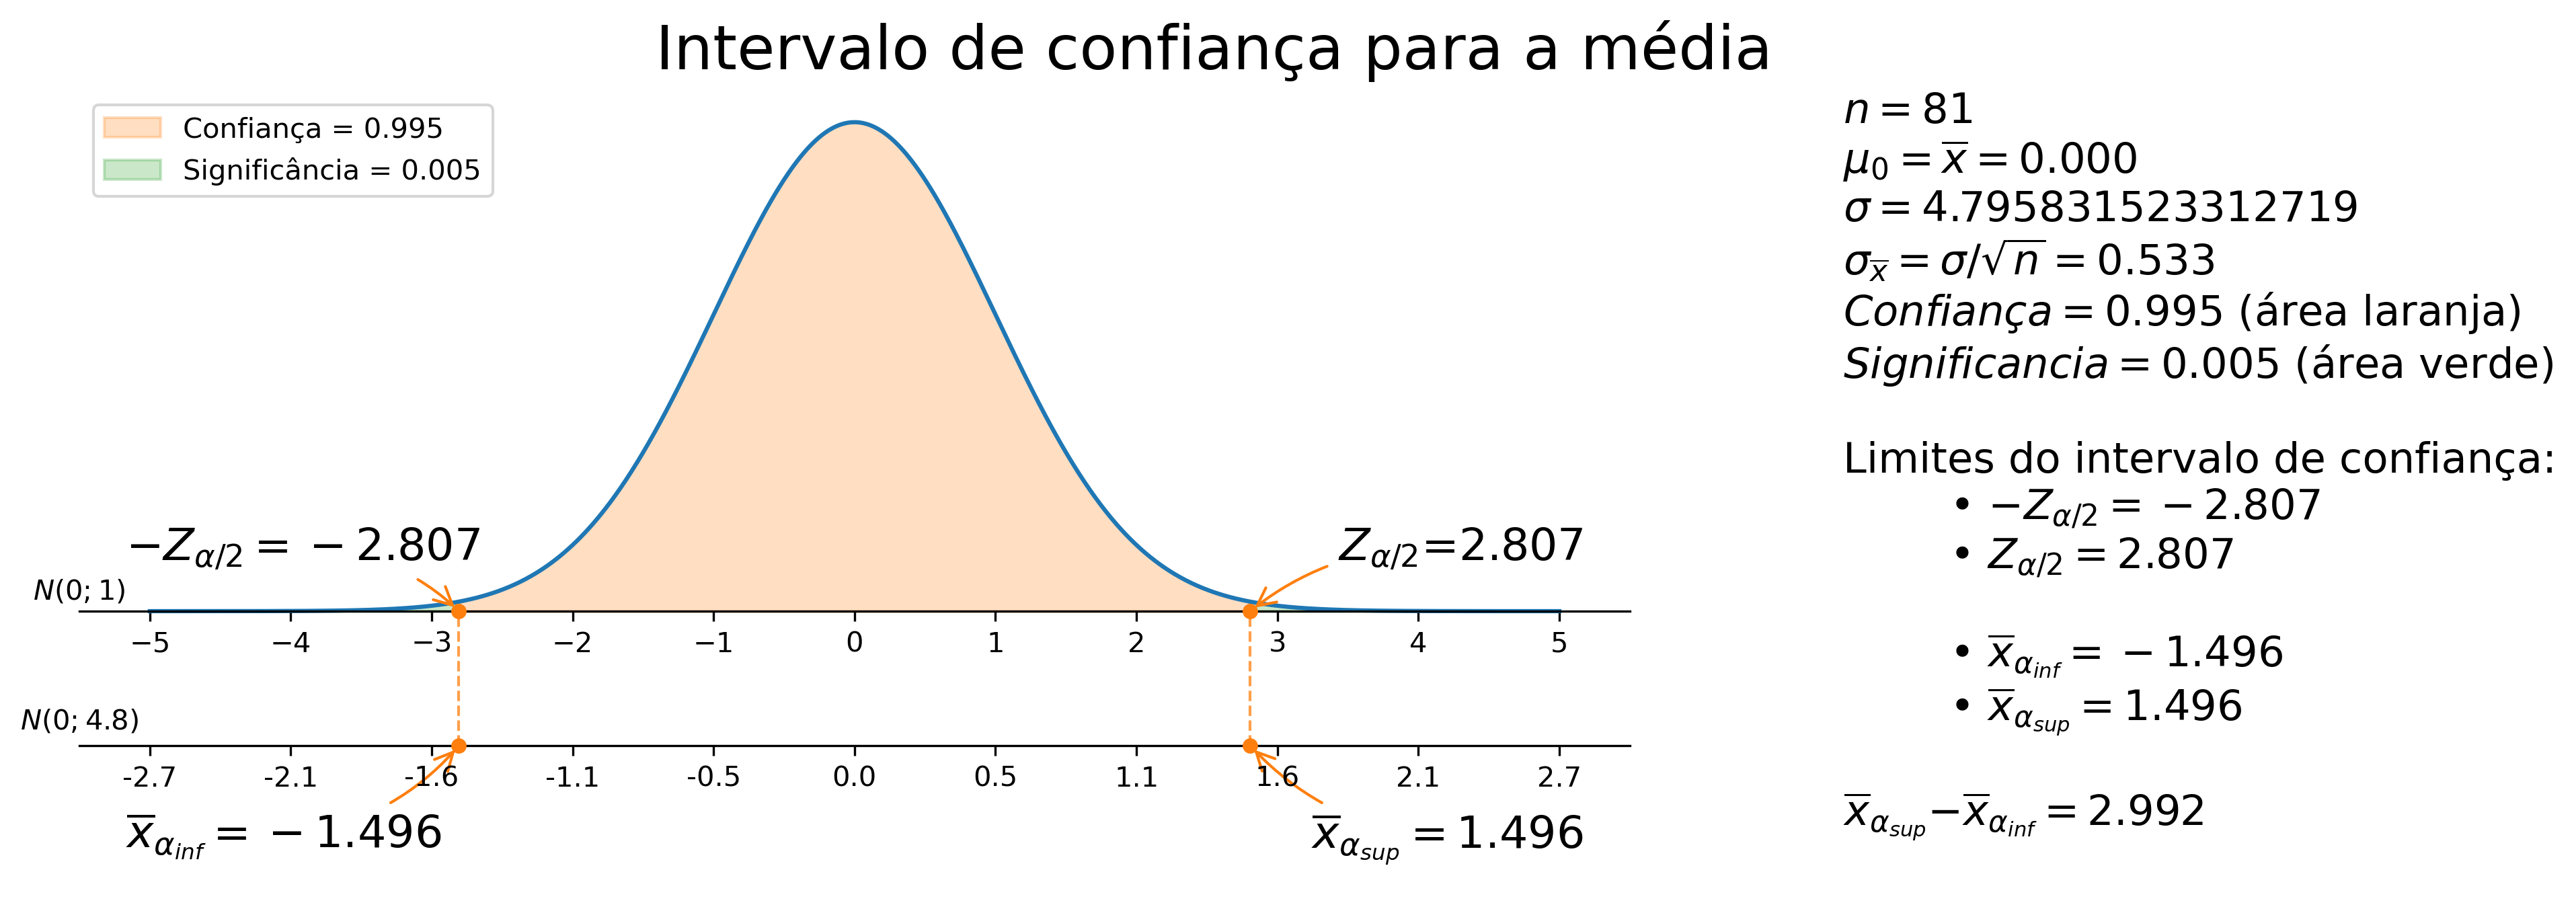

In [9]:
pop_mean_interval(n=81, x_bar=0, sigma=np.sqrt(23), conf=.995)

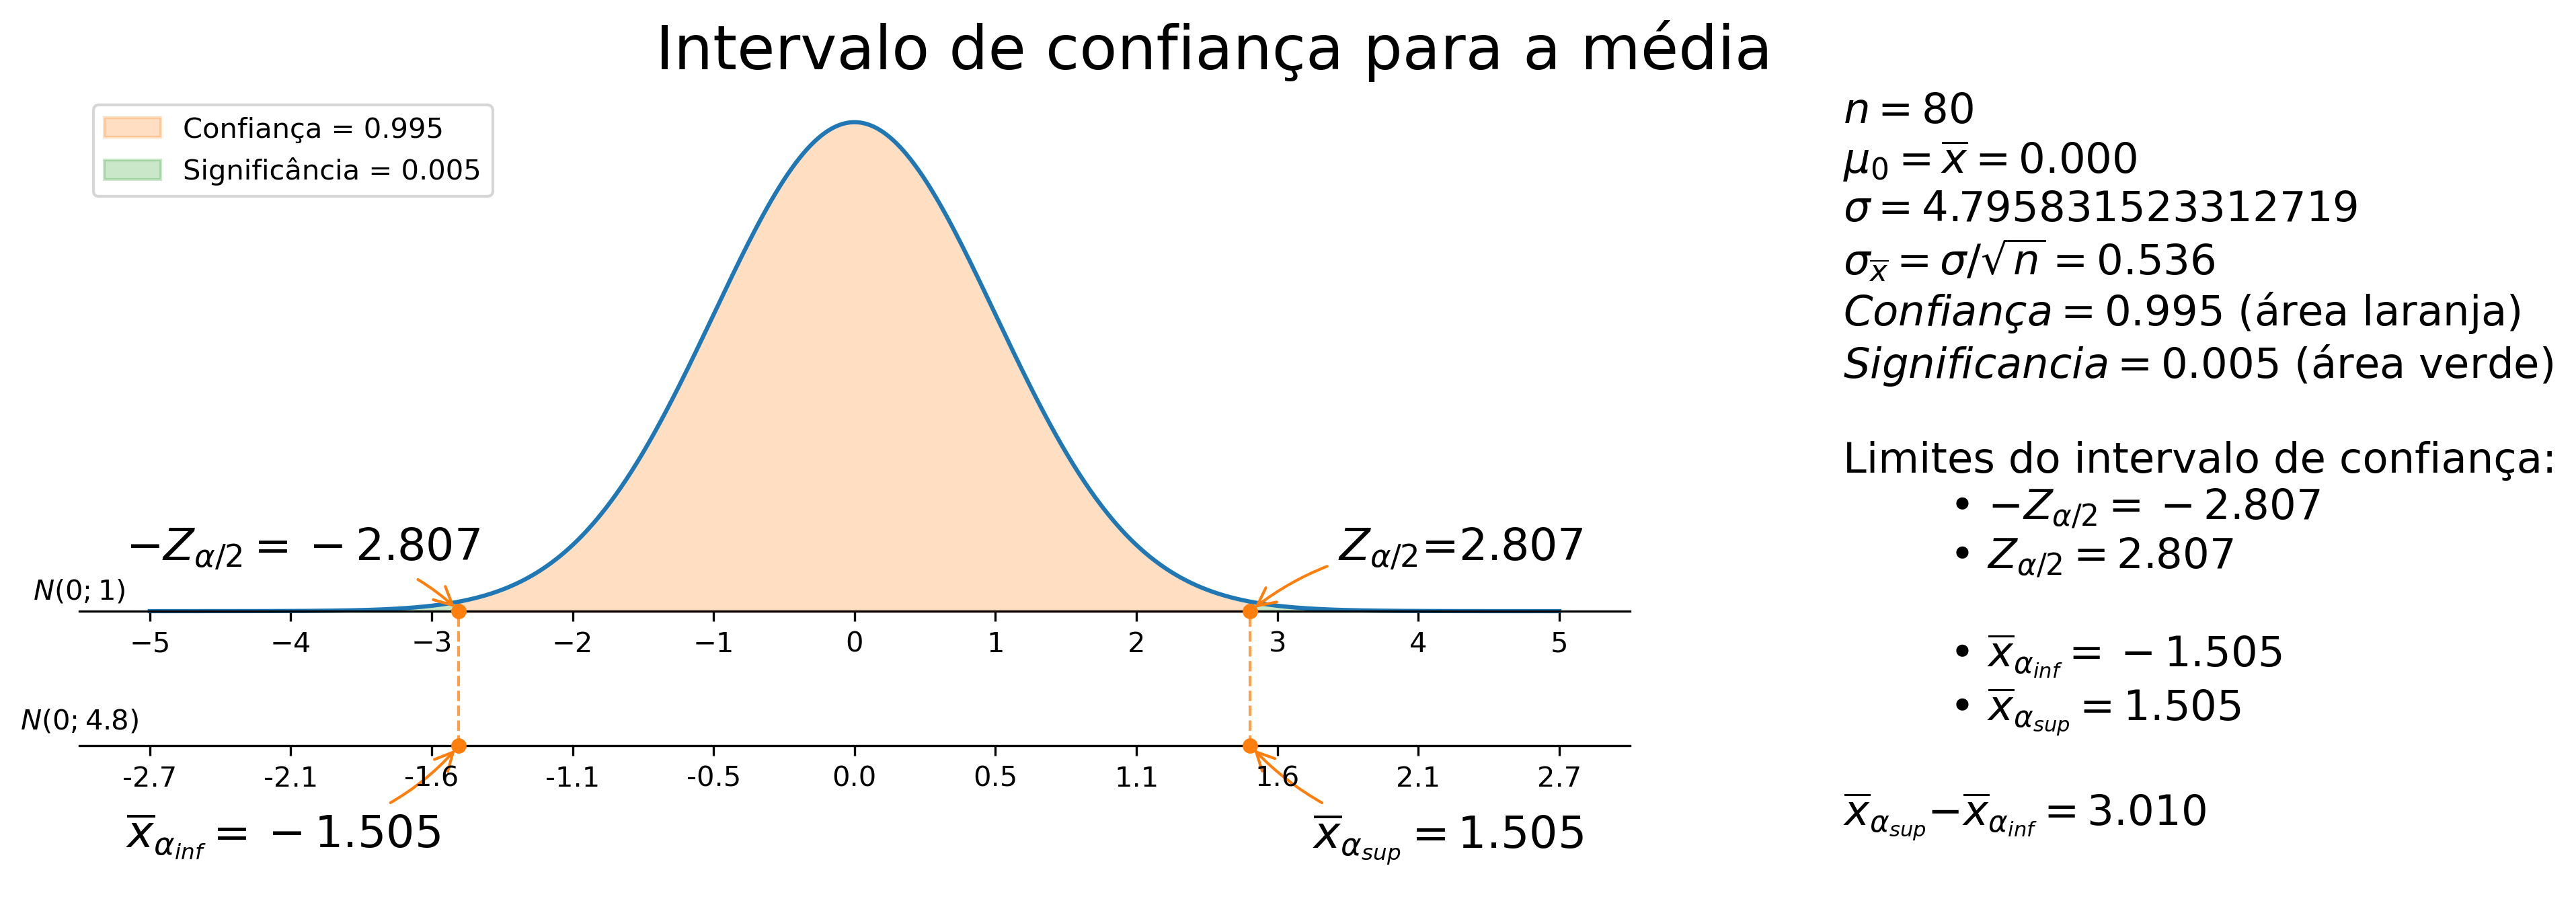

In [10]:
pop_mean_interval(n=80, x_bar=0, sigma=np.sqrt(23), conf=.995)

---

Uma marca particular de margarina diet foi analisada para determinar o nível em porcentagem de ácidos graxos insaturados. Uma amostra de seis pacotes resultou nos seguintes dados: 16,8; 17,2; 17,4; 16,9; 16,5 e 17,1. Encontre o intervalo de confiança de 99% para a amostra.

In [11]:
amostras = [16.8, 17.2, 17.4, 16.9, 16.5, 17.1]

from scipy.stats import t
import numpy as np

# desvio padrão da média:
confianca = 0.99
med_amostra = np.mean(amostras)
sigma = np.std(amostras, ddof=1)
n = len(amostras)
ddof = n-1
desvio_med = sigma/np.sqrt(n)

limite_inf, limite_sup = t.interval(confianca, loc=med_amostra, scale=desvio_med, df=ddof)
limite_inf, limite_sup

(16.458465942824343, 17.508200723842325)

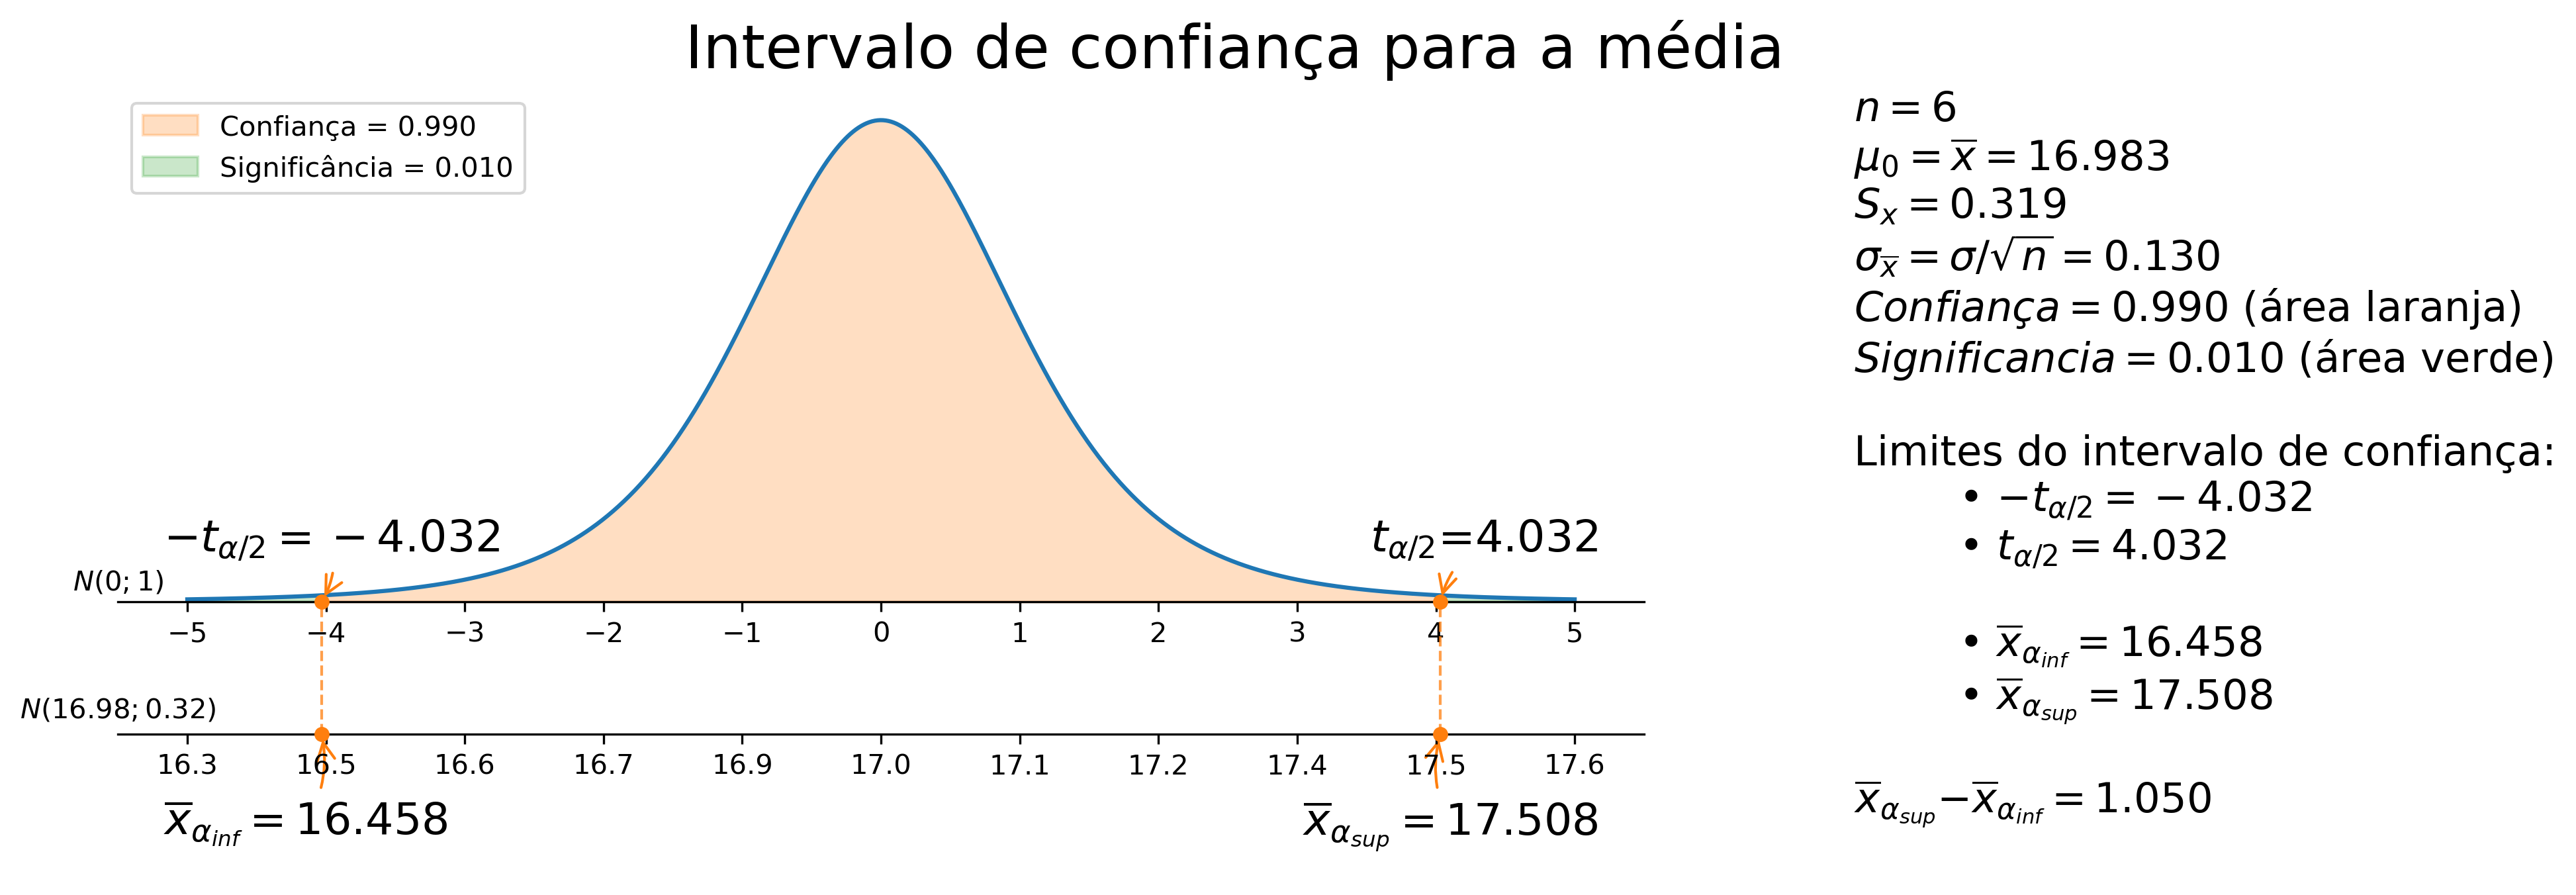

In [12]:
pop_mean_interval(n=n, x_bar=med_amostra, sigma=sigma, conf=confianca, dist="student")

---

Uma amostra piloto com 12 elementos tem média de 6,7 e desvio padrão de 1,7. Qual deve ser o tamanho da amostra para que a semi amplitude do intervalo de 99,5% de confiança da média populacional não seja superior a 0,8.

In [13]:
from scipy.stats import t
import numpy as np

#Encontra o desvio padrão a partir de um intervalo e sua confiança
def t_find_sigma(alpha, interval, df):
    z = -t.ppf((1-alpha)/2, df)
    z_i = interval/2
    return z_i/z

n=12 
ddof=n-1 
confianca = 0.995 
sigma = 1.7 
semi_amplitude = .8 
amplitude = 2*semi_amplitude
desv_media_amostra = t_find_sigma(confianca, amplitude, ddof)
n = math.ceil((sigma/desv_media_amostra)**2)
n

56

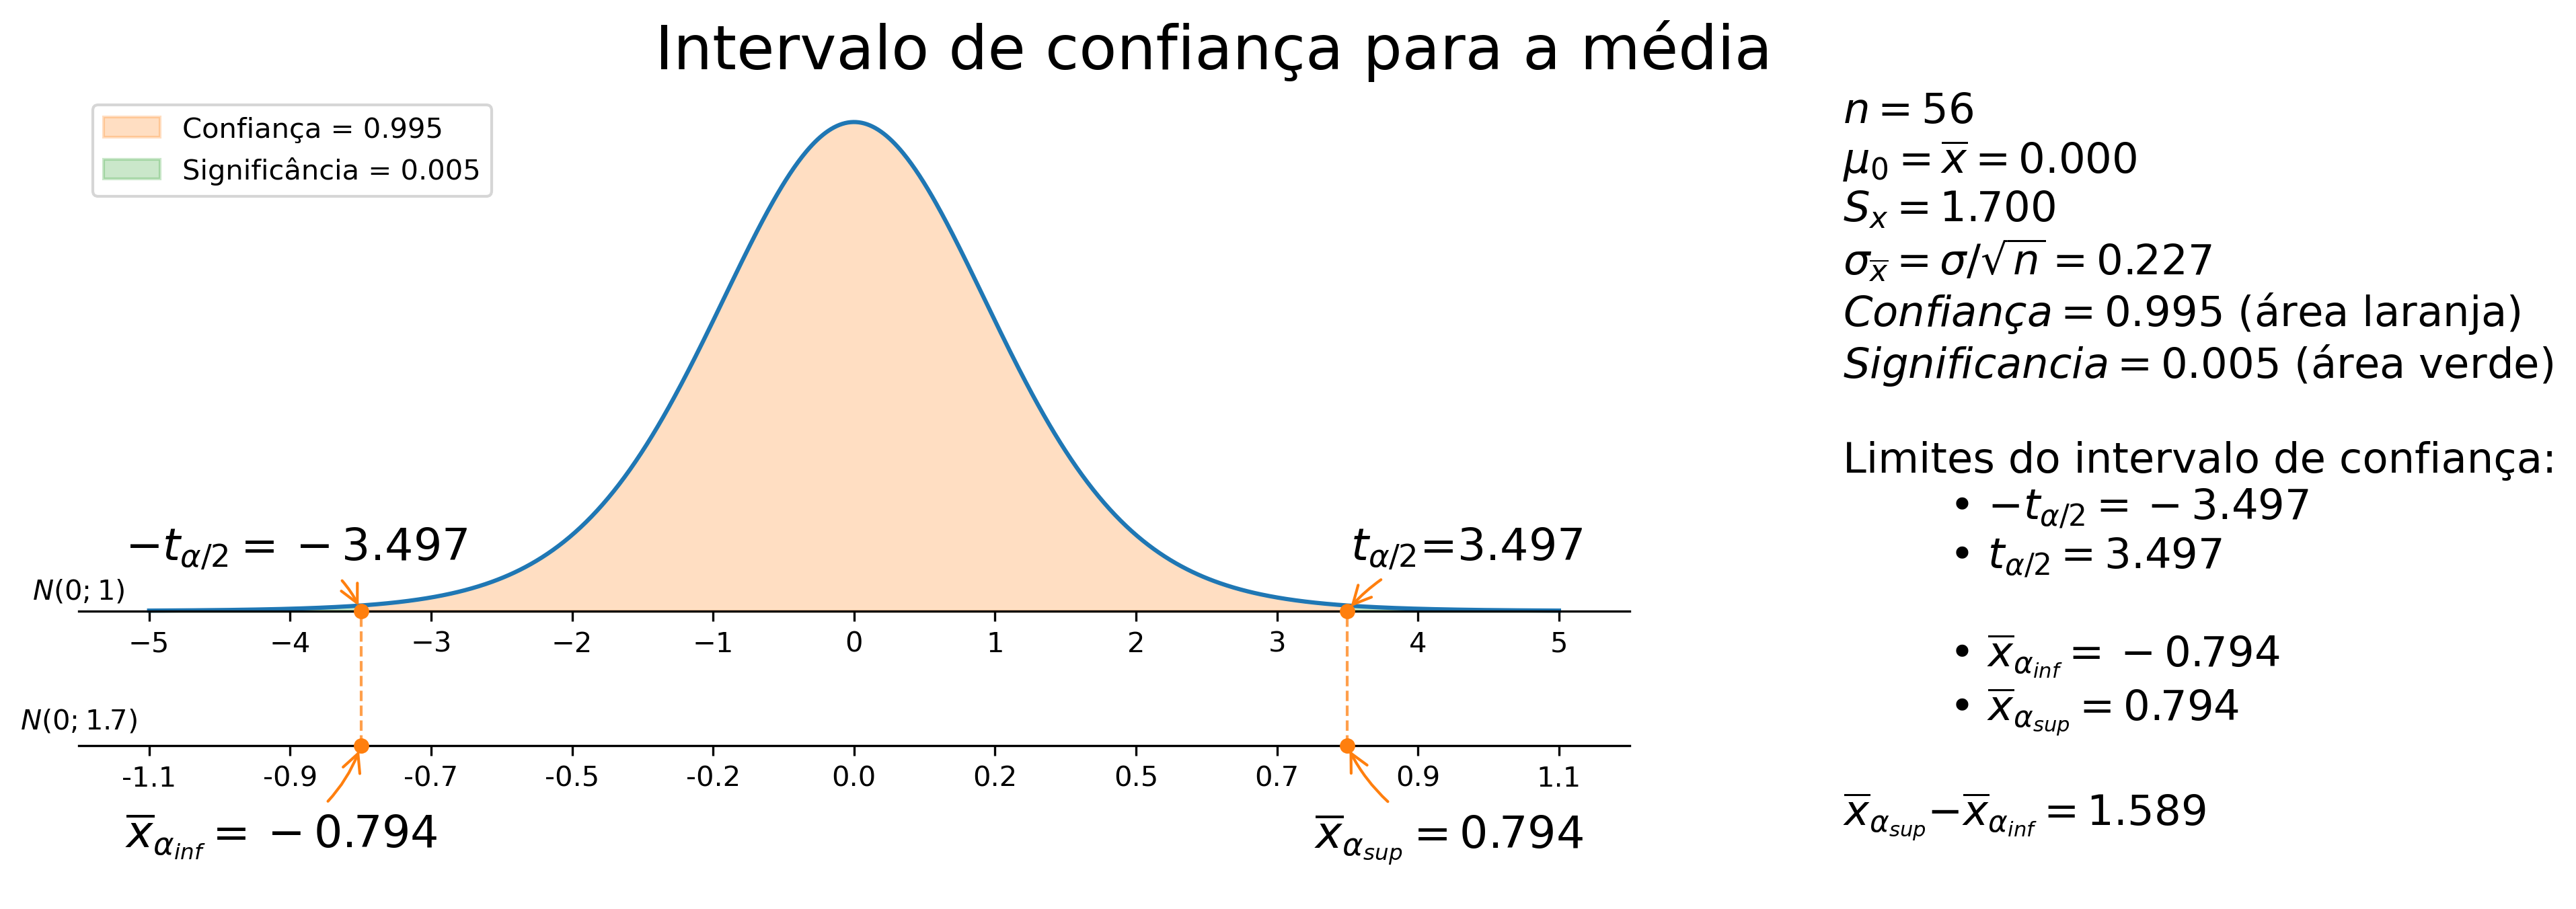

In [14]:
pop_mean_interval(n=56, x_bar=0, sigma=sigma, conf=confianca, dist="student", n_student=12)

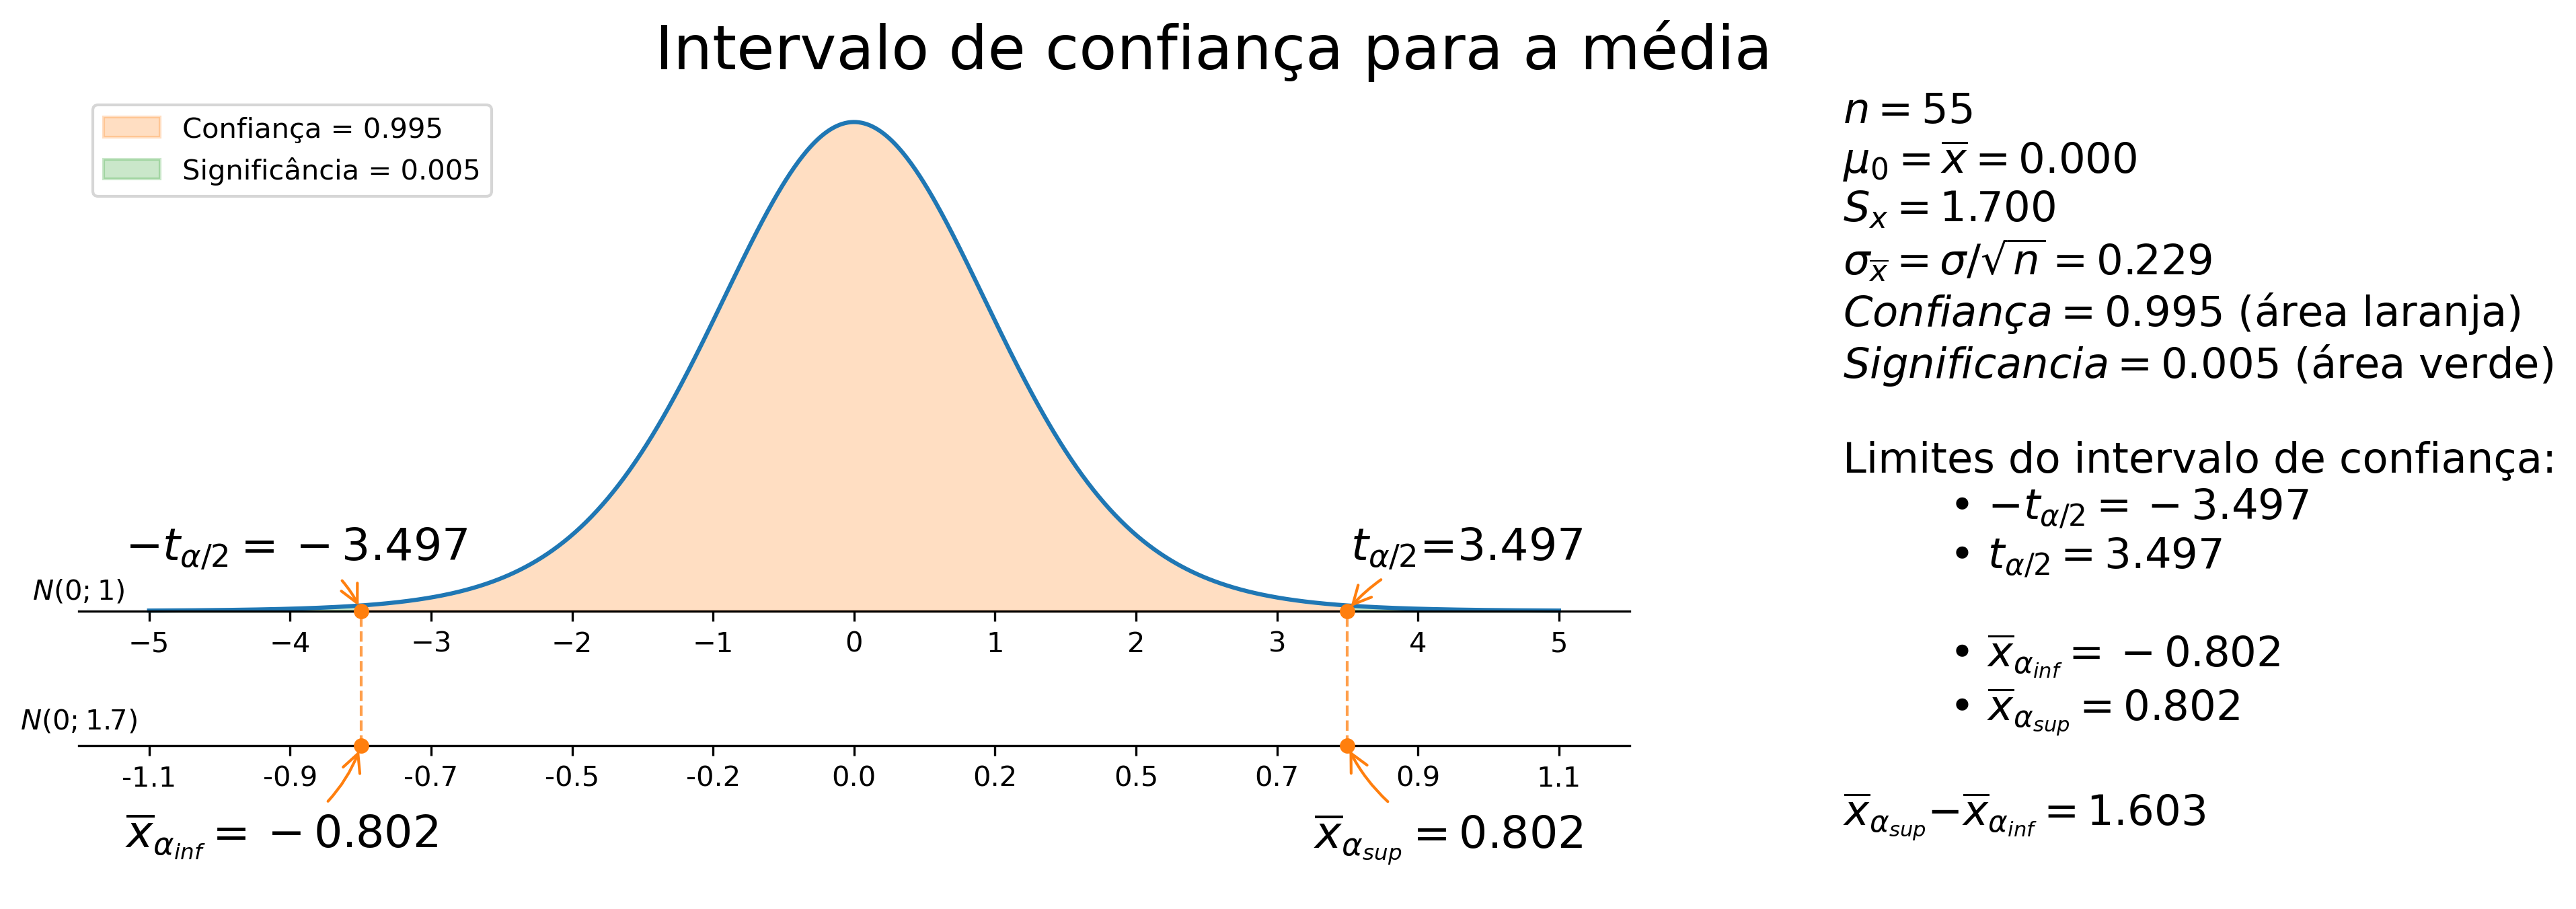

In [15]:
pop_mean_interval(n=55, x_bar=0, sigma=sigma, conf=confianca, dist="student", n_student=12)

---

Calcular o intervalo de confiança de 95% para a seguinte amostra, com variância populacional desconhecida:

`19,8; 18,5; 17,6; 16,7; 15,8; 15,4; 14,1; 13,6; 11,9; 11,4; 11,4; 8,8; 7,5; 15,4; 15,4; 19,5; 14,9; 12,7; 11,9; 11,4; 10,1; 7,9`

In [16]:
from scipy.stats import t
import numpy as np

amostras = [19.8, 18.5, 17.6, 16.7, 15.8, 15.4, 14.1, 13.6, 11.9, 11.4, 11.4, 8.8, 7.5, 15.4, 15.4, 19.5, 14.9, 12.7, 11.9, 11.4, 10.1, 7.9]

confianca = 0.95 
med_amostra = np.mean(amostras) 
sigma = np.std(amostras, ddof=1) 
n = len(amostras) 
ddof = n-1 
sigma_media_pop = sigma/np.sqrt(n) 
limite_inf, limite_sup = t.interval(confianca, loc=med_amostra, scale=sigma_media_pop, df=ddof) 
limite_inf, limite_sup

(12.138069152904343, 15.289203574368383)

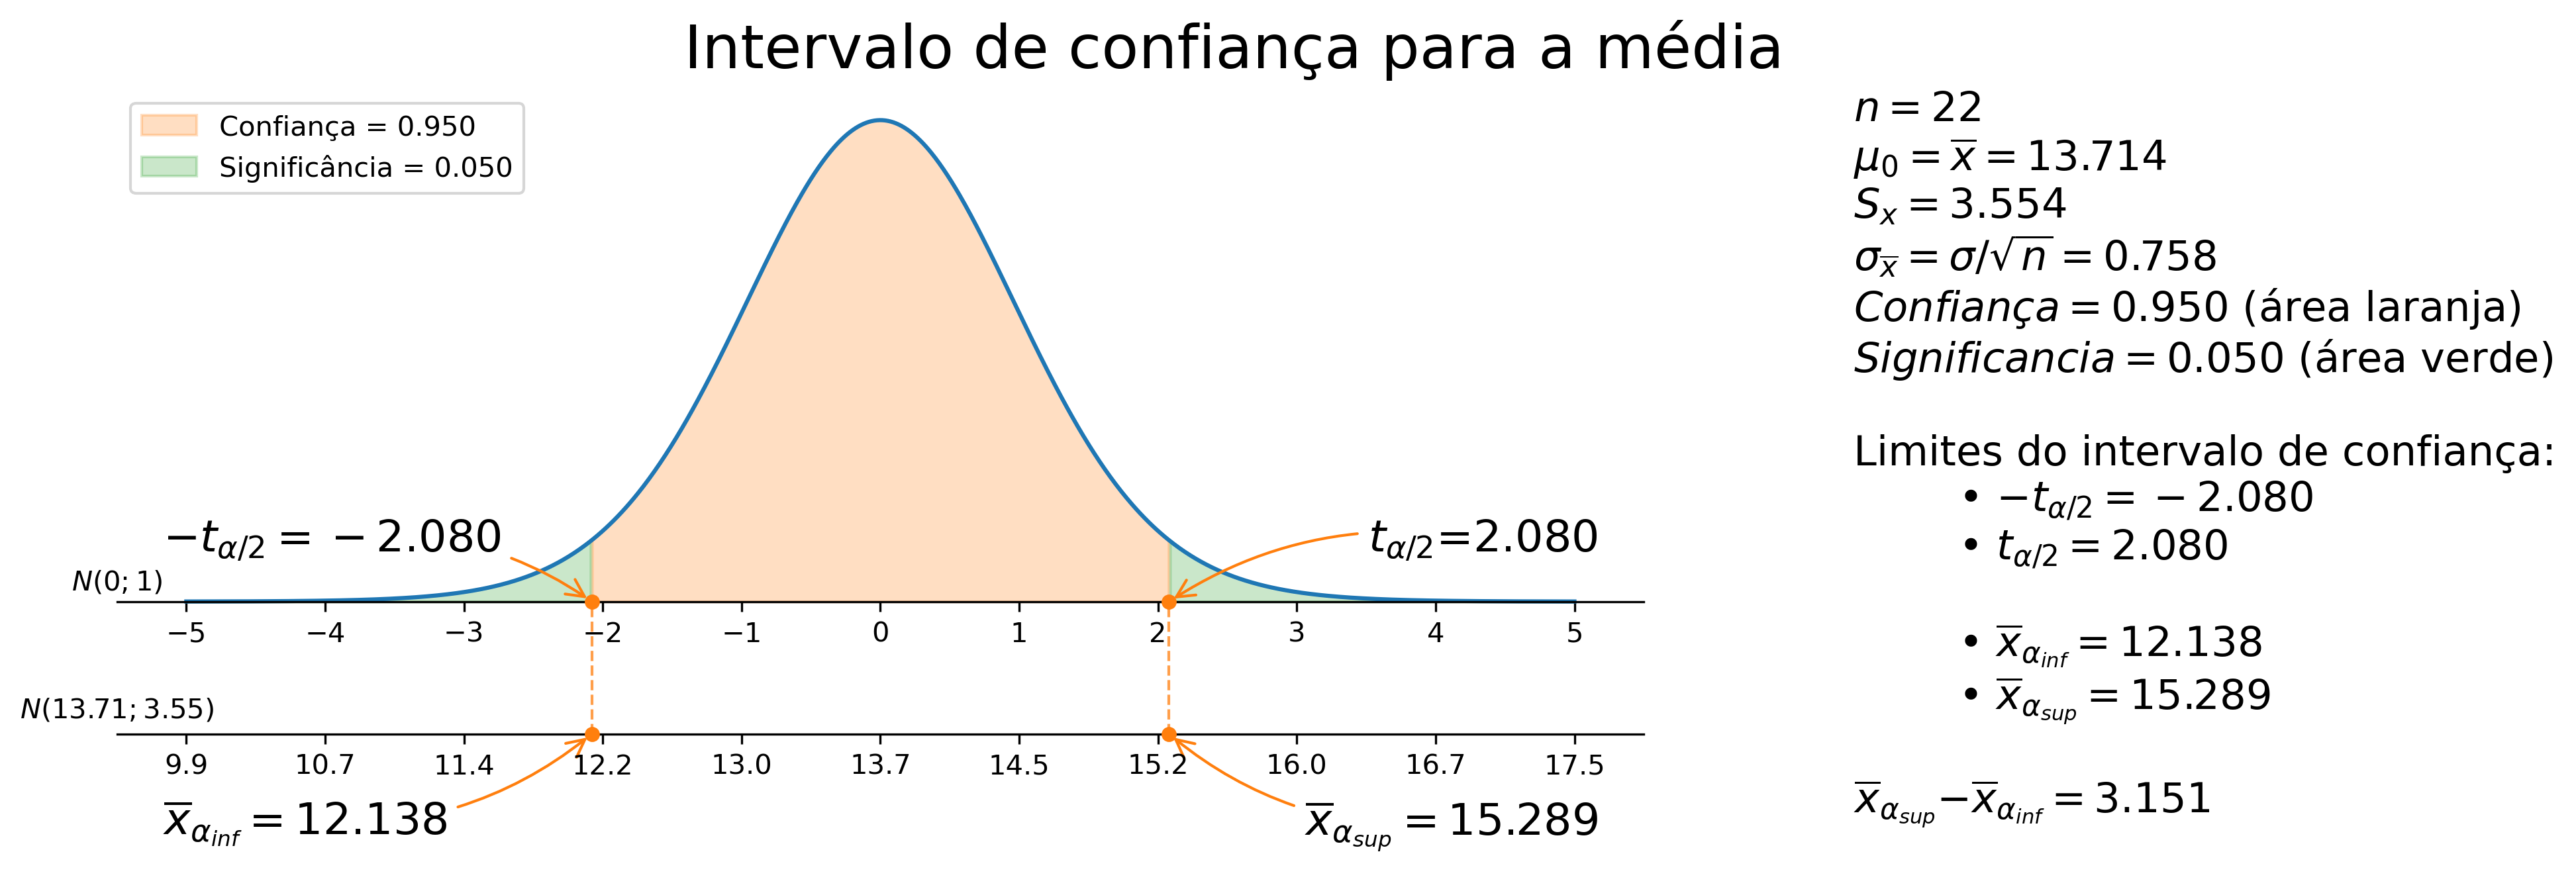

In [17]:
pop_mean_interval(n=n, x_bar=med_amostra, sigma=sigma, conf=confianca, dist="student")

---
---
---

# Exercícios de teste de hipótese

Um fabricante de farinha afirma que a quantidade média de farinha nas embalagens de seu principal produto é de 500 g. Um teste de pesagem em 30 embalagens amostradas ao acaso mostrou um peso médio igual à 485 g. Estudos anteriores afirmam que a distribuição dos pesos segue uma normal e que o desvio padrão populacional é igual a 20 g. Considerando um nível de significância igual a 5%, responda as seguintes questões:

1) Qual a hipótese nula a ser testada?

2) Qual o valor da estatística de teste?

3) Qual a conclusão do teste?

1) $H_0: \mu = 500$

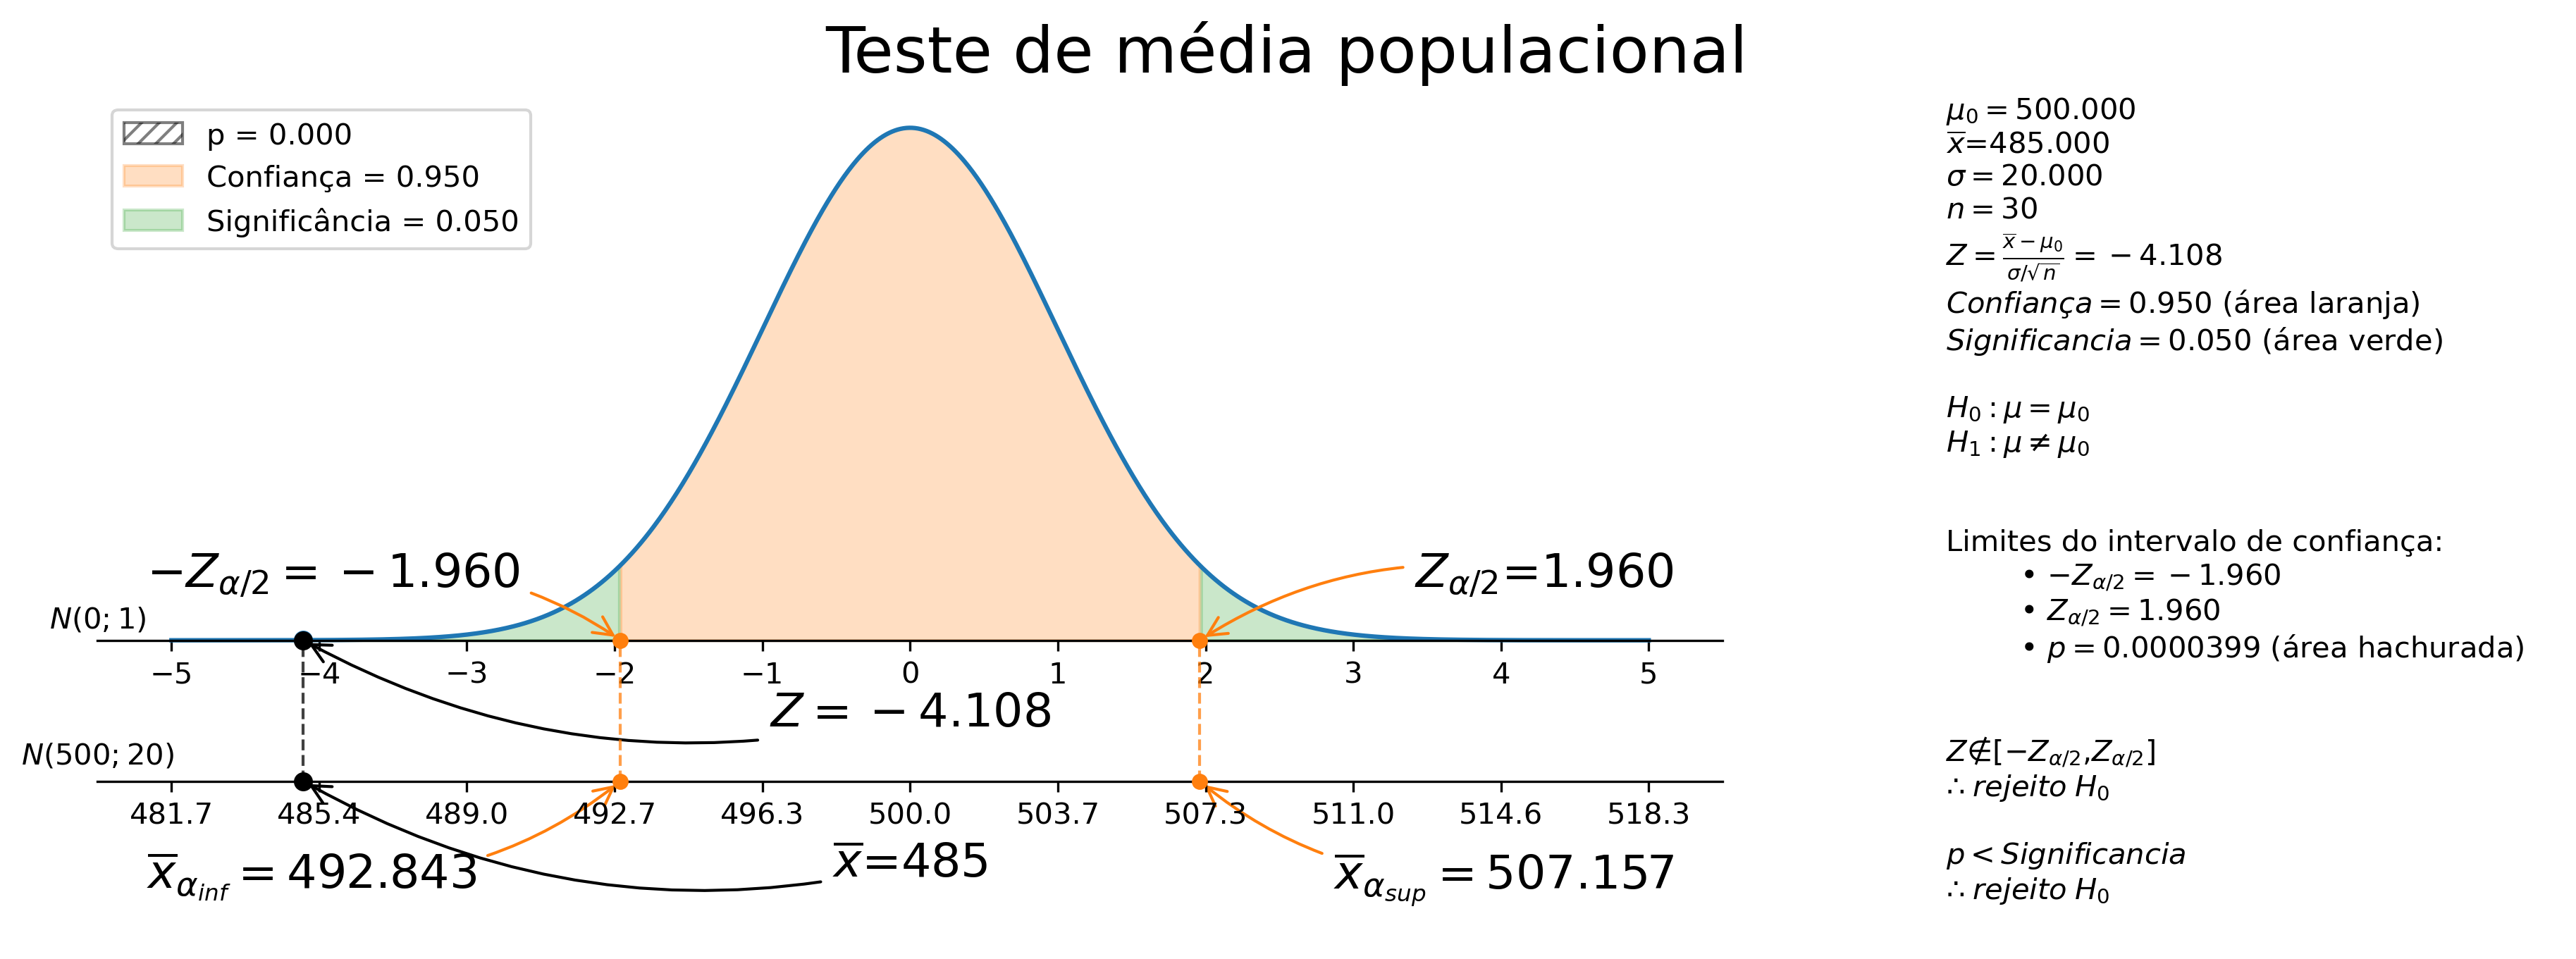

In [18]:
significancia = 0.05
confianca = 1-significancia
pop_mean_test(mu=500, n=30, x_bar=485, sigma=20, conf=confianca, test='eq')

2) $Z = -4.108$
3) $rejeito\;H_0$

---

Considere novamente os dados do exercício anterior. Um fabricante de farinha afirma que a quantidade média de farinha nas embalagens de seu principal produto é de 500 g. Um teste de pesagem em 30 embalagens amostradas ao acaso mostrou um peso médio igual à 485 g. Estudos anteriores afirmam que a distribuição dos pesos segue uma normal e que o desvio padrão populacional é igual a 20 g. Com um nível de significância igual a 5%, teste a hipótese nula de que a média do processo é igual a 500 g e marque a alternativa que indica o p-valor do teste aplicado (considere somente 5 casas decimais).

$p=0.0000399$

---

A empresa Limpa Esgoto garante ser capaz de realizar o tratamento de esgoto e obter, no máximo, 150 g de impurezas para cada mil litros de esgoto tratado. Vinte amostras de mil litros de esgoto apresentaram, em média, 230 g de impurezas e desvio padrão amostral igual a 90 g.

Assumindo alfa igual a 5% e população normalmente distribuída, seria possível discordar da empresa Limpa Esgoto? Assinale a alternativa que apresenta a estatística de teste e a decisão correta do teste.

$H_0: \mu\leq 150g/1000l$

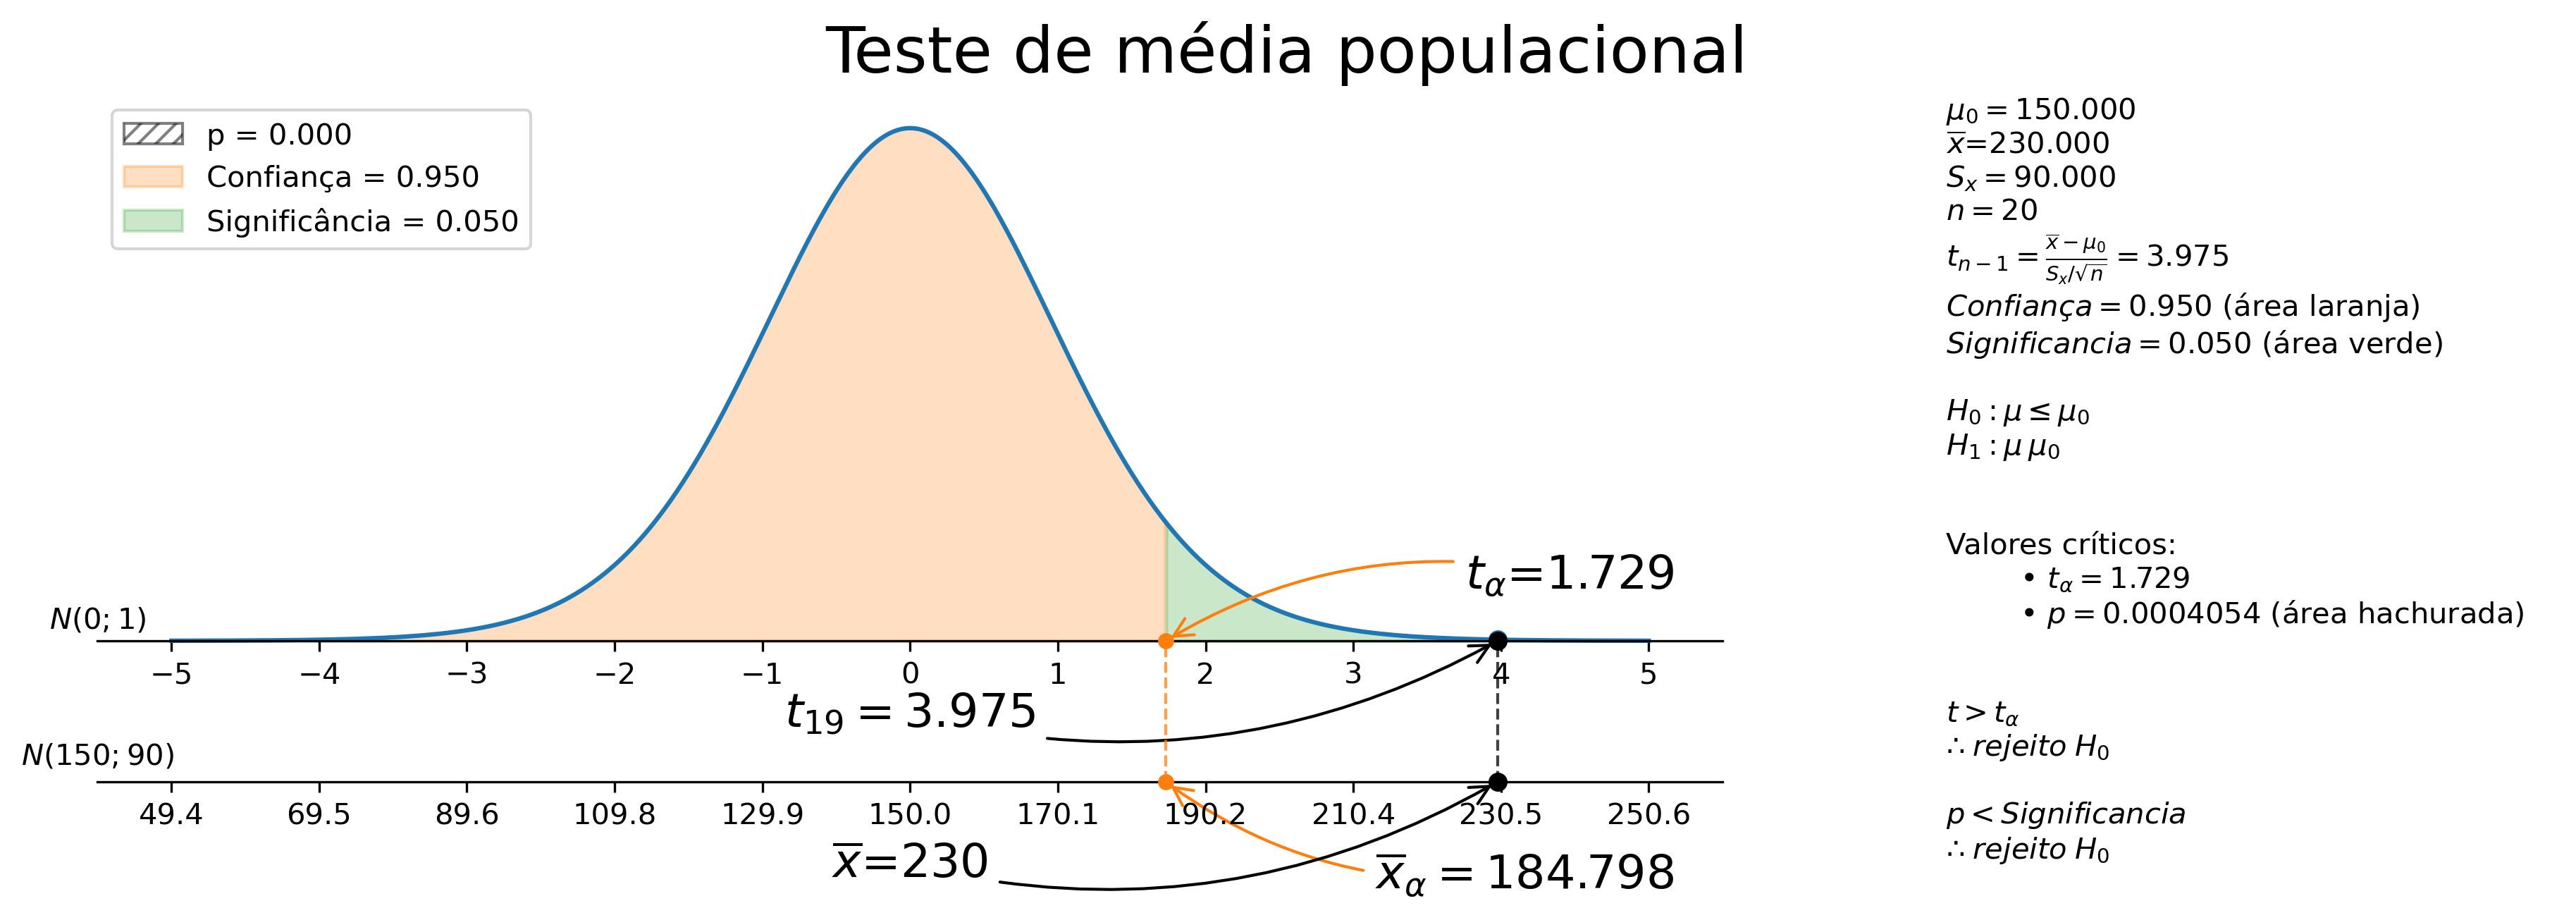

In [19]:
significancia = 0.05
confianca = 1-significancia
pop_mean_test(mu=150, n=20, x_bar=230, sigma=90, conf=confianca, test='le', dist='student')

$t=3.975$

$rejeito\;H_0$

---

A pizzaria Muito Queijo alega que a quantidade de queijo em suas pizzas tamanho família é de, no mínimo, 350 g. Uma amostra de 35 pizzas tamanho família revelou uma média de 330 g de queijo por pizza. O desvio padrão amostral foi de 80 g.

Assumindo alfa igual a 5% e população normalmente distribuída, seria possível discordar da alegação da pizzaria? Assinale a alternativa que apresenta a estatística de teste e a decisão correta do teste.

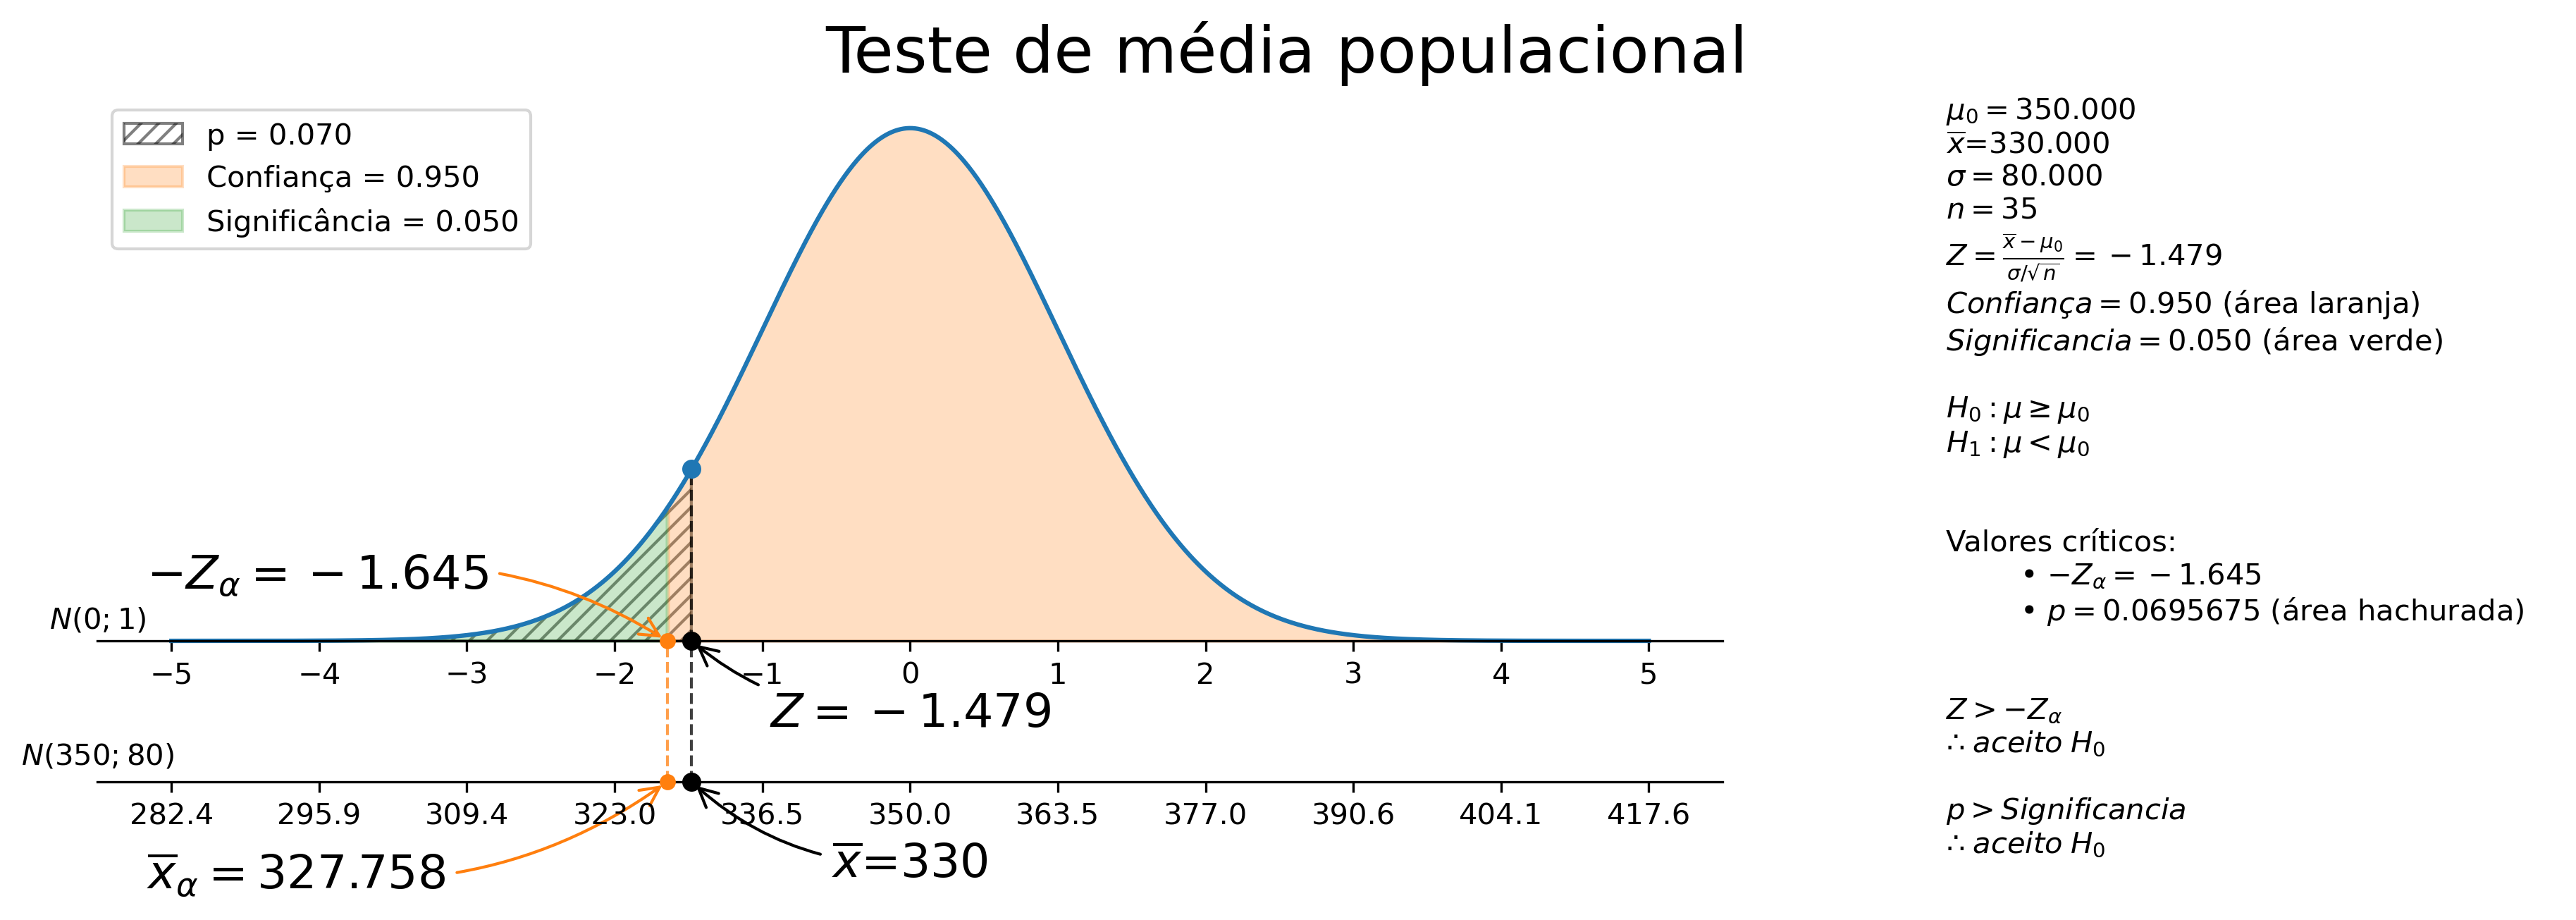

In [20]:
significancia = 0.05
confianca = 1-significancia
pop_mean_test(mu=350, n=35, x_bar=330, sigma=80, conf=confianca, test='ge')

$Z=-1.479$

$aceito\;H_0$